## AIM : Implement the SIFT algorithm to detect and match key points between two images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the images
img1 = cv2.imread('/content/image1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/image2.png', cv2.IMREAD_GRAYSCALE)

In [3]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

In [4]:
# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [5]:
# FLANN parameters and matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

In [6]:
# Ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

In [7]:
# Draw matches
sift_result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

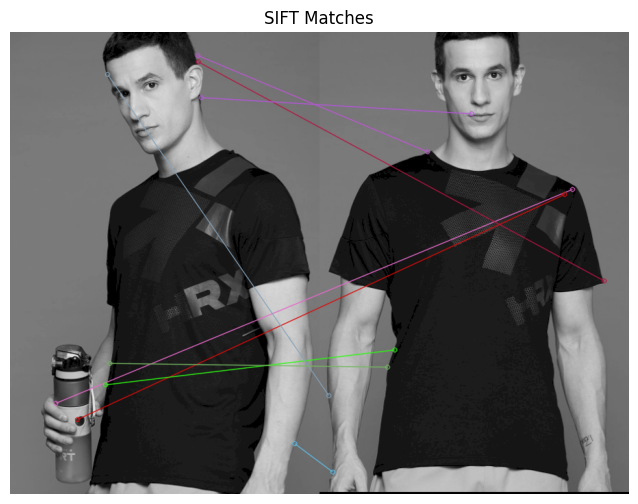

In [8]:
# Save result
cv2.imwrite('results/sift_result.jpg', sift_result)

# Show result with matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(sift_result, cv2.COLOR_BGR2RGB))
plt.title('SIFT Matches')
plt.axis('off')
plt.show()

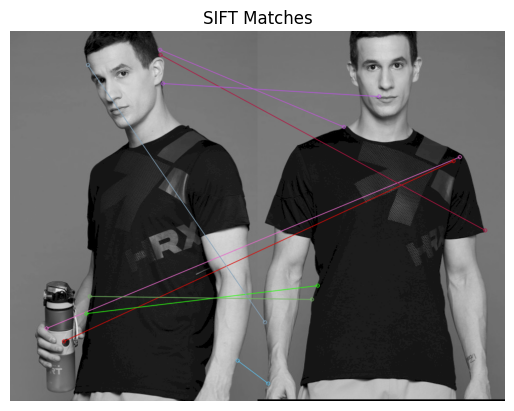

In [9]:
plt.imshow(cv2.cvtColor(sift_result, cv2.COLOR_BGR2RGB))
plt.title("SIFT Matches")
plt.axis('off')
plt.show()